<a href="https://colab.research.google.com/github/jherrerae/Project2/blob/main/Project_2_Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
filename="/content/drive/MyDrive/Coding Dojo/Classes/Datasets/E-Commerce Shipping Data_Train.csv"
df=pd.read_csv(filename)
df.head(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
df.shape

(10999, 12)

First choice: dataset 1

1) Source of data

Kaggle
https://www.kaggle.com/datasets/prachi13/customer-analytics

2) Brief description of data

An international e-commerce company based wants to discover key insights from their customer database.

3) What is the target?

Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.


4) Is this a classification or regression problem?

Classification

5) How many features?

12 columns

6) How many rows of data.

10999

7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?

combination of categorical and numerical values, evaluate if variables hshould be taken into account in the model

#Data Dictionary
ID: ID Number of Customers.

Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.

Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.

Customer care calls: The number of calls made from enquiry for enquiry of the shipment.

Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).

Cost of the product: Cost of the Product in US Dollars.

Prior purchases: The Number of Prior Purchase.

Product importance: The company has categorized the product in the various parameter such as low, medium, high.

Gender: Male and Female.

Discount offered: Discount offered on that specific product.
Weight in gms: It is the weight in grams.

Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

#Data Formatting


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [7]:
#duplicated values
df.duplicated().sum()

0

In [8]:
#Checking for inconsistencies in names for each categorical column

dtypes = df.dtypes
str_cols = dtypes[dtypes=='object'].index

for col in str_cols:
    print(f"- Column= {col}")
    print(df[col].value_counts(dropna=False))
    print('\n\n')

- Column= Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64



- Column= Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64



- Column= Product_importance
low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64



- Column= Gender
F    5545
M    5454
Name: Gender, dtype: int64





No duplicated values or missing values.

Categorical features look good. No inconsistencies found. 

In [9]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


#Data Viz

In [4]:
plt.style.use('seaborn')
#Use seaborn style for plots

##Target

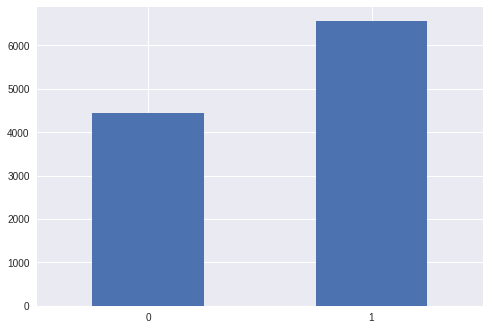

In [20]:
df['Reached.on.Time_Y.N'].value_counts().sort_values().plot(kind = 'bar').tick_params(axis='x', rotation=0)

plt.show()


Class balance looks ok

##Features

###Numerical

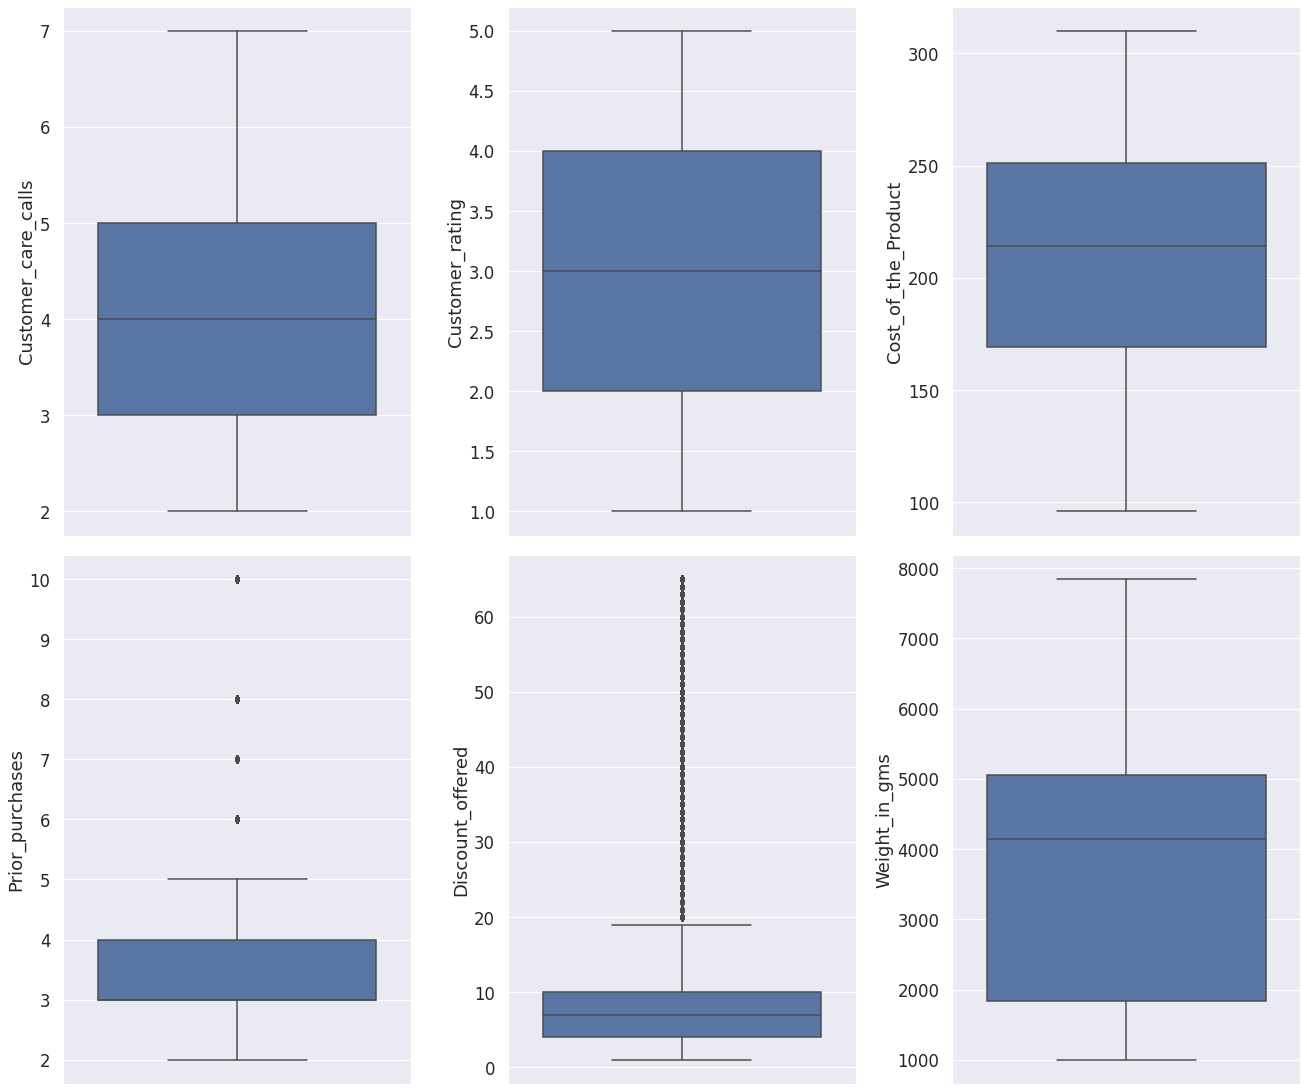

In [8]:
fig, axs = plt.subplots(squeeze=False,nrows=2,ncols=3)
fig.set_size_inches(18.5, 15.5)
sns.set(font_scale = 1.5)
a=sns.boxplot(data=df, y='Customer_care_calls',ax=axs[0,0])
b=sns.boxplot(data=df, y='Customer_rating',ax=axs[0,1])
c=sns.boxplot(data=df, y='Cost_of_the_Product',ax=axs[0,2])
d=sns.boxplot(data=df, y='Prior_purchases',ax=axs[1,0])
f=sns.boxplot(data=df, y='Discount_offered',ax=axs[1,1])
c=sns.boxplot(data=df, y='Weight_in_gms',ax=axs[1,2])
fig.tight_layout()
plt.show;

There are several outliers for Prior_purchases and Discount_offered

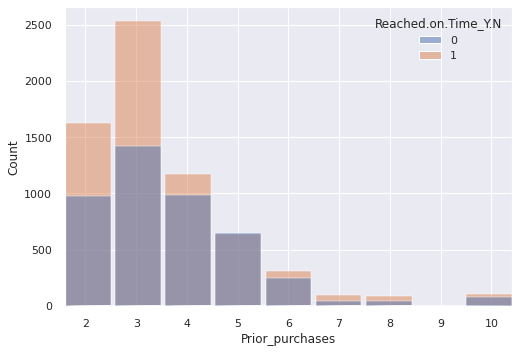

In [48]:
pp=sns.histplot(data=df,x="Prior_purchases",hue='Reached.on.Time_Y.N');

#Source
#https://stackoverflow.com/questions/34888058/changing-width-of-bars-in-bar-chart-created-using-seaborn-factorplot

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(pp, .9)

plt.show()

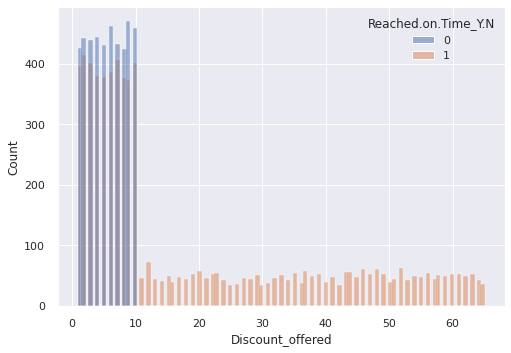

In [47]:
er=sns.histplot(data=df,x="Discount_offered",hue='Reached.on.Time_Y.N');

#Source
#https://stackoverflow.com/questions/34888058/changing-width-of-bars-in-bar-chart-created-using-seaborn-factorplot
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(er, .7)

plt.show()

Data is skewed right for Prior_purchases and Discount_offered.

Discount_offered is where the data is more spread having discounts over 50$

Additionally, all the products with a higher discount did not arrive on time

###Categorical

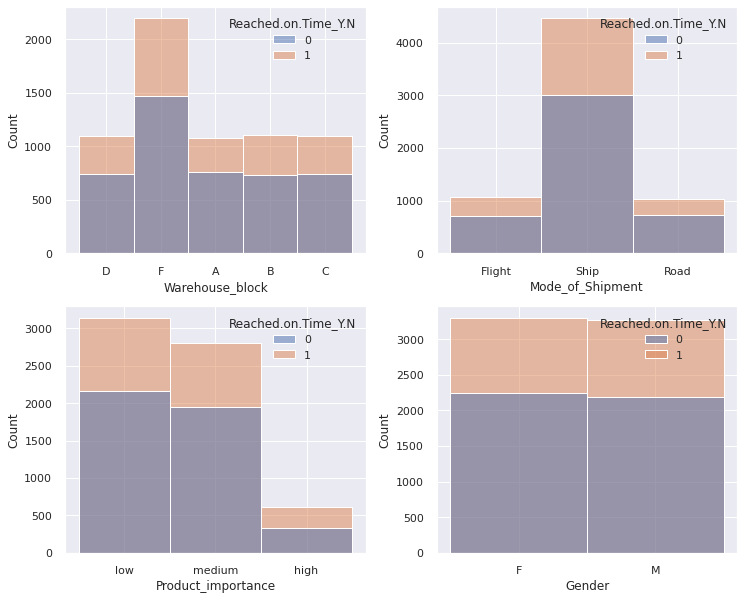

In [49]:
fig, axs = plt.subplots(squeeze=False,nrows=2,ncols=2)
fig.set_size_inches(10.5, 8.5)
sns.set(font_scale = 1)
a=sns.histplot(data=df, x='Warehouse_block',ax=axs[0,0],hue='Reached.on.Time_Y.N')
b=sns.histplot(data=df, x='Mode_of_Shipment',ax=axs[0,1],hue='Reached.on.Time_Y.N')
c=sns.histplot(data=df, x='Product_importance',ax=axs[1,0],hue='Reached.on.Time_Y.N')
d=sns.histplot(data=df, x='Gender',ax=axs[1,1],hue='Reached.on.Time_Y.N')
fig.tight_layout()

plt.show;

The outliers found were in discount_offered and are relate to the items that didn't arrive on time.

Additionally ID column will be dropped for classification, given that is an ID it should not be included.


In [50]:
from sklearn.model_selection import train_test_split

In [52]:
df = df.rename(columns={'Reached.on.Time_Y.N': 'State'})

# split X and y


X = df.drop(columns=['State','ID'])
y = df['State']

# Train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
